In [314]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\Giacomo\Documents\gitRepos\Serena\shared_nbks/'
imgname = 'classe 5.JPG'

# CANNY PIPELINE

Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 180 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




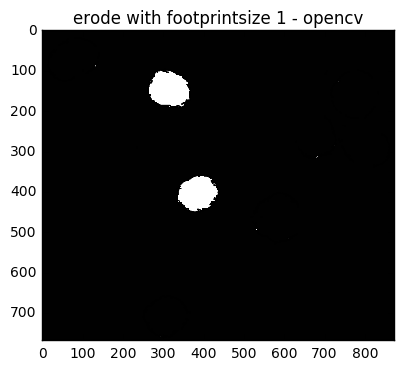

In [4]:
granulecheck = CannyPipeline(path + imgname, channel='blue')
result = granulecheck.run([120, 180], 3, 3, 1, 1)
# show the resulting image of the detected bubbles
granulecheck.plot()
# show the individual steps performed to get this result
granulecheck.what_have_i_done()

## example filtering with standard values

In [5]:
#calculate properties
marker_image, props = bubble_properties_calculate(result) 

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


In [6]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
7,8375,"(148.13480597, 314.155820896)",8709,103.263649,374.492424,22.363603,1.332574
8,27,"(102.407407407, 101.185185185)",27,5.863230,16.828427,1.604428,0.834667
10,52,"(108.615384615, 701.5)",64,8.136858,31.313708,1.660615,1.500568
12,34,"(157.0, 831.411764706)",37,6.579525,22.485281,1.512100,1.183335
15,36,"(197.416666667, 727.083333333)",39,6.770275,22.485281,1.601047,1.117595


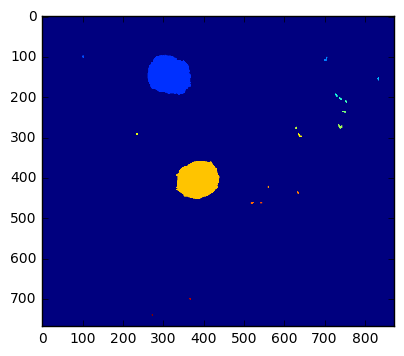

In [7]:
plt.imshow(marker_image)

## example filtering with custom values

<b> Changing the 'Circularity reciprocal' max value from 1.2 to 1.5 you can consider more circular particles and also the big ones are falling in

In [8]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.5, 'min':0.3}}) 

{'max': 1.5, 'min': 0.3}
{'min': 0.0}


In [9]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
7,8375,"(148.13480597, 314.155820896)",8709,103.263649,374.492424,22.363603,1.332574
8,27,"(102.407407407, 101.185185185)",27,5.863230,16.828427,1.604428,0.834667
12,34,"(157.0, 831.411764706)",37,6.579525,22.485281,1.512100,1.183335
15,36,"(197.416666667, 727.083333333)",39,6.770275,22.485281,1.601047,1.117595
16,36,"(206.083333333, 737.416666667)",38,6.770275,22.485281,1.601047,1.117595


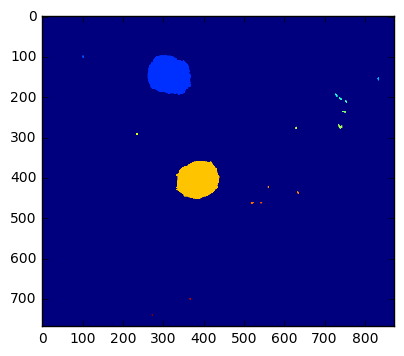

In [10]:
plt.imshow(marker_image)

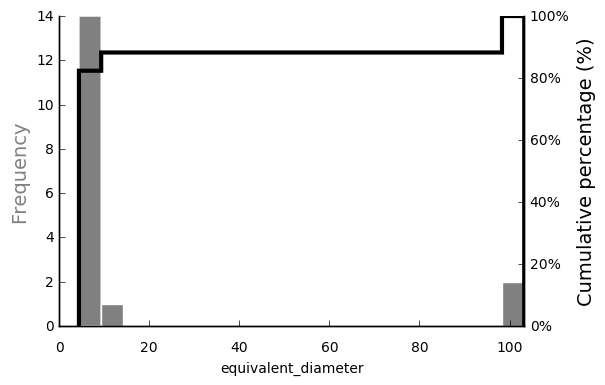

In [11]:
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot

# ADAPTIVE THRESHOLD PIPELINE

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 101 and cvalue 10 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




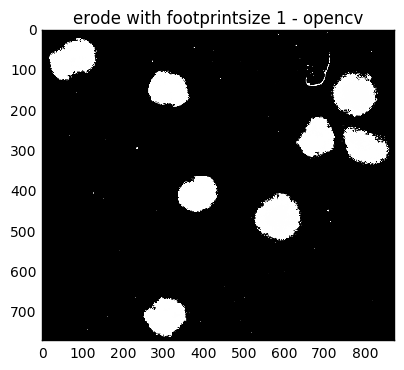

In [21]:
granulecheck = AdaptiveThresholdPipeline(path + imgname, channel='red')
result = granulecheck.run(101, 10, 3, 1, 1)
# show the resulting image of the detected granules
granulecheck.plot()

# show the individual steps performed to get this result
granulecheck.what_have_i_done()

In [27]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.2, 'min':0.3}}) 

{'max': 1.2, 'min': 0.3}
{'min': 0.0}


In [28]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
6,4,"(30.0, 70.75)",4,2.256758,4.621320,0.865554,0.424876
9,11,"(39.6363636364, 628.454545455)",12,3.742410,9.656854,1.139087,0.674635
10,3,"(45.3333333333, 49.3333333333)",3,1.954410,3.414214,0.878680,0.309208
11,8,"(45.125, 376.125)",8,3.191538,7.414214,1.079009,0.546802
13,5,"(53.8, 133.6)",5,2.523133,5.207107,0.960226,0.431532


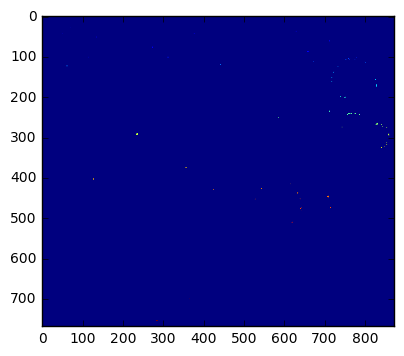

In [20]:
plt.imshow(marker_image)

# Custom pipeline

## Original image

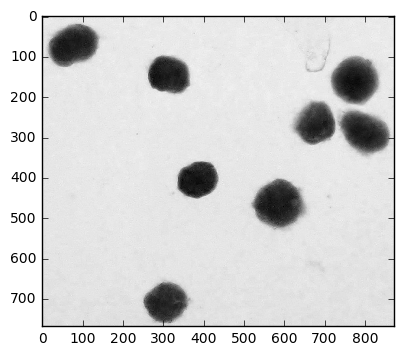

In [190]:
granulecheck = BubbleKicker(path + imgname, channel='blue')
granulecheck.plot();

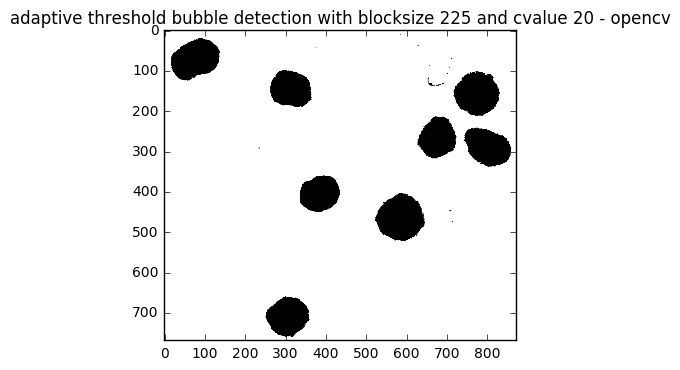

In [191]:
granulecheck.adaptive_threshold_opencv(225, 20)
granulecheck.plot();

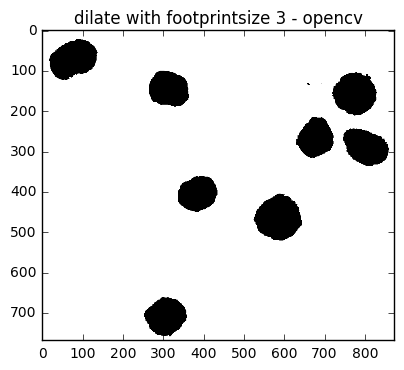

In [192]:
granulecheck.dilate_opencv(3)
granulecheck.plot();

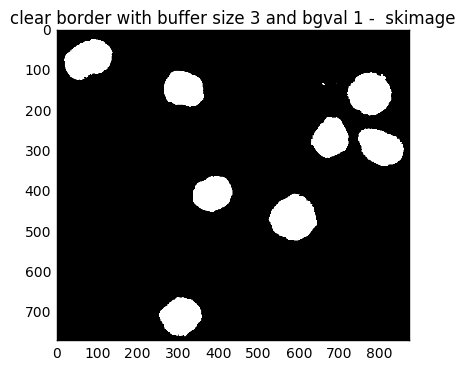

In [193]:
granulecheck.clear_border_skimage(3,1)
granulecheck.plot();

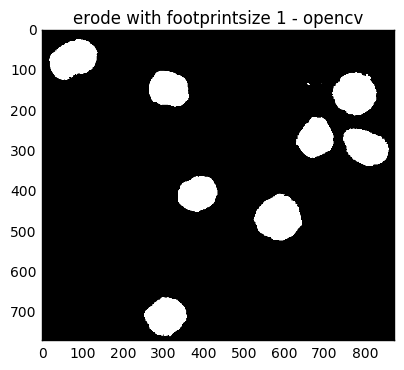

In [194]:
granulecheck.erode_opencv()
granulecheck.plot();

In [195]:
granulecheck.what_have_i_done()

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 225 and cvalue 20 - opencv
dilate with footprintsize 3 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




## Calculate granules properties

In [295]:
# calcola le proprieta' dei blob nell'immagine
marker_image, props = bubble_properties_calculate(granulecheck.current_image,rules={'convexity': {'min':1.9}, #
                                                                 'circularity_reciprocal': {'max': 5, 'min': 0.2}});

{'max': 5, 'min': 0.2}
{'min': 1.9}


In [317]:
# definisce classi
def classe(equivalent_diameter_mm):
    if equivalent_diameter_mm >= 1+1:
        return 5 
    elif 0.8+1 <= equivalent_diameter_mm < 1+1:
        return 4
    elif 0.5+1 <= equivalent_diameter_mm < 0.8+1:
        return 3
    elif 0.2+1 <= equivalent_diameter_mm < 0.5+1:
        return 2
    elif equivalent_diameter_mm < 0.2+1:
        return 1

# aggiunge colonna con misura effettiva dei granuli
props['equivalent_diameter_mm'] = props['equivalent_diameter']/49
# aggiunge una colonnna 'classe' alle proprieta'
props['classe']=props["equivalent_diameter_mm"].apply(classe)
props

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal,equivalent_diameter_mm,classe
label,,,,,,,,,
1,8624,"(74.15317718, 76.6881957328)",8958,104.787489,382.877200,22.524193,1.352697,2.138520,5
2,6998,"(147.908545299, 313.030437268)",7194,94.393487,325.521861,21.497788,1.204971,1.926398,4
3,8789,"(159.441460917, 773.580839686)",9182,105.785171,391.255880,22.463560,1.386029,2.158881,5
7,6739,"(268.956076569, 676.164564475)",6979,92.630240,334.835570,20.126297,1.323908,1.890413,4
8,7653,"(291.229844505, 800.205278976)",7956,98.712219,365.906638,20.915171,1.392192,2.014535,5
9,6631,"(406.778917207, 384.637762027)",6797,91.884990,315.764502,20.999827,1.196569,1.875204,4
10,9892,"(466.432976142, 584.371512333)",10209,112.226938,411.013239,24.067351,1.358994,2.290346,5
11,7341,"(710.363983109, 305.785315352)",7586,96.679116,343.877200,21.347737,1.281863,1.973043,4


In [309]:
classi=props["equivalent_diameter_mm"].apply(classe)
props.count()

area                      8
centroid                  8
convex_area               8
equivalent_diameter       8
perimeter                 8
convexity                 8
circularity_reciprocal    8
equivalent_diameter_mm    8
classe                    8
dtype: int64

## Selected and classified granules

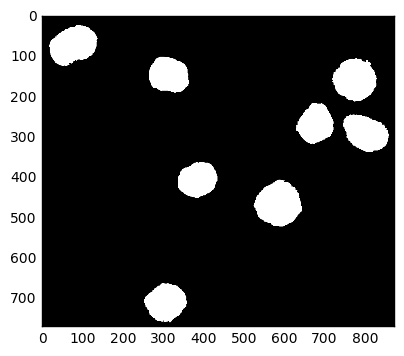

In [310]:
plt.imshow(marker_image>0, cmap='gray')

In [307]:
# conta per ogni classe quanti granuli ci sono
props[['equivalent_diameter_mm', 'classe']].groupby(['classe']).agg(['count'])

,equivalent_diameter_mm
,count
classe,
4,4
5,4


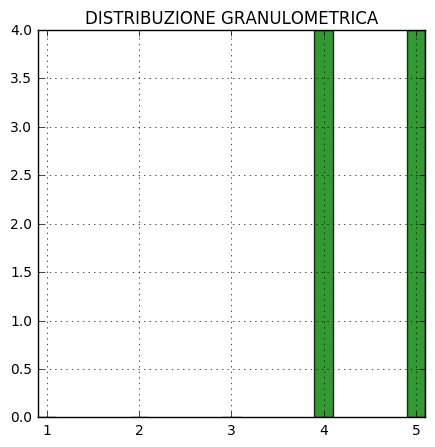

In [316]:
fig = plt.figure(figsize=(5,5));
plt.xticks([k for k in range(0,7)]);
classi.hist(bins = np.arange(1,7)-0.5, 
            rwidth=0.2, 
            color='green', 
            align='mid', 
            alpha=0.8); #rwidth =spessore barra #non riesco a mettere il numero al centro della barra

plt.grid('on'),plt.title('DISTRIBUZIONE GRANULOMETRICA')
plt.savefig(path + '\\' + 'distribuzione_granulometrica.jpg',dpi=500)

In [319]:
# con questo archivi la posizione x e y e la classe di ogni centroide in tre variabili (x,y e cls)
x = []; y = []; cls = []
for i in props['centroid'].reset_index().index:
    x = np.append(x, props['centroid'].values[i][1])
    y = np.append(y, props['centroid'].values[i][0])
    cls = np.append(cls, props['classe'].values[i])

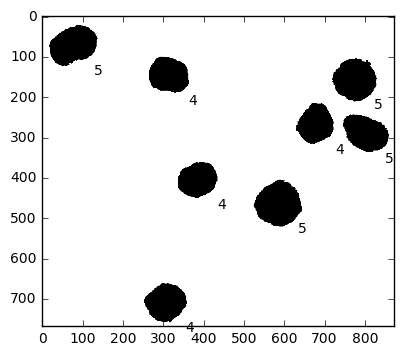

In [320]:
fig, ax1 = plt.subplots()
# il maggiore di zero serve per fare tutti i pippoli neri, se lo levi diventa scala di grigi
ax1.imshow(marker_image>0, cmap='binary', interpolation='bilinear'); 
for i in np.arange(len(x)):
    ax1.annotate(str(int(cls[i])), xy=(x[i], y[i]), xytext=(x[i]+50, y[i]+70)); # possibile futuro miglioramento sara' visualizzare 